<a href="https://colab.research.google.com/github/renato-rodrig/prova_selecao/blob/main/Quest%C3%A3o_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configurando DarkNet

In [1]:
# Fazendo Updates
!apt-get update
!apt-get upgrade

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:2 http://archive.ubuntu.com/ubuntu focal InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Get:4 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:5 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:6 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [969 kB]
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:12 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,069 kB]
Hit:13 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRele

In [2]:
#instalando dependencias

!apt-get install build-essential
!apt-get install cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.8ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu4).
cmake is already the newest version (3.16.3-1ubuntu1.20.04.1).
git is already the newest version (1:2.25.1-1ubuntu3.10).
libavcodec-dev is already the newest version (7:4.2.7-0ubuntu0.1).
libavcodec-dev set to manually installed.
libavformat-dev is already the newest version (7:4.2.7-0ubuntu0.1).
libavformat-dev set to manually installed.
libswscale-dev is already the newest version (7:4.2.7-0ubuntu0.1).
libswscale-dev set to manually installed.
The following additional packages will be installed:
  autopoint debhelper dh-autoreconf dh-strip-nondeterminism dwz gettext
  gettext-base gir1.2-gtk-2.0 gir1.2-harfbuzz-0

In [7]:
# Instalando dependencias
!apt-get install libavcodec-dev libavformat-dev libswscale-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libavcodec-dev is already the newest version (7:4.2.7-0ubuntu0.1).
libavformat-dev is already the newest version (7:4.2.7-0ubuntu0.1).
libswscale-dev is already the newest version (7:4.2.7-0ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


In [8]:
!apt-get -y install cmake
!which cmake

!cmake --version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.16.3-1ubuntu1.20.04.1).
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
/usr/local/bin/cmake
cmake version 3.25.2

CMake suite maintained and supported by Kitware (kitware.com/cmake).


In [9]:
# Instalando Opencv
!apt-get install libopencv-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libopencv-dev is already the newest version (4.2.0+dfsg-5+focal2).
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


In [10]:
# Clonando repositorio do Alexey
!git clone https://github.com/AlexeyAB/darknet/

Cloning into 'darknet'...
remote: Enumerating objects: 15514, done.
remote: Total 15514 (delta 0), reused 0 (delta 0), pack-reused 15514
Receiving objects: 100% (15514/15514), 14.17 MiB | 15.69 MiB/s, done.
Resolving deltas: 100% (10412/10412), done.


In [11]:
# Instalando dependencias
!apt-get install vim

Reading package lists... Done
Building dependency tree       
Reading state information... Done
vim is already the newest version (2:8.1.2269-1ubuntu5.12).
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


In [12]:
# Caso queira ver o arquivo Makefile (lembre-se de parar a celula manualmente)

%cd darknet
#!vim Makefile


/content/darknet


In [13]:
# Baixando pesos do wget yolov3-tiny
!ls
!wget https://pjreddie.com/media/files/yolov3-tiny.weights

3rdparty		darknet_video.py       net_cam_v4.sh
build			data		       README.md
build.ps1		image_yolov3.sh        results
cfg			image_yolov4.sh        scripts
cmake			include		       src
CMakeLists.txt		json_mjpeg_streams.sh  vcpkg.json
DarknetConfig.cmake.in	LICENSE		       vcpkg.json.opencv23
darknet_images.py	Makefile	       video_yolov3.sh
darknet.py		net_cam_v3.sh	       video_yolov4.sh
--2023-04-01 13:17:19--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  41.8MB/s    in 0.8s    

2023-04-01 13:17:20 (41.8 MB/s) - ‘yolov3-tiny.weights’ saved [35434956/35434956]



In [14]:
# Algumas modificações no arquivo makefile para conseguirmos usar a GPU e build darknet
!ls

!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/g' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile

3rdparty		data		       results
build			image_yolov3.sh        scripts
build.ps1		image_yolov4.sh        src
cfg			include		       vcpkg.json
cmake			json_mjpeg_streams.sh  vcpkg.json.opencv23
CMakeLists.txt		LICENSE		       video_yolov3.sh
DarknetConfig.cmake.in	Makefile	       video_yolov4.sh
darknet_images.py	net_cam_v3.sh	       yolov3-tiny.weights
darknet.py		net_cam_v4.sh
darknet_video.py	README.md


In [17]:
# Abra o arquivo MakeFile e modifique a linha 20 para
'''
ARCH= -gencode arch=compute_50,code=[sm_50,compute_50] \
      -gencode arch=compute_52,code=[sm_52,compute_52] \
	    -gencode arch=compute_61,code=[sm_61,compute_61]
'''

In [ ]:
#Uncomment to check whether it worked, needs to be stopped manually 
#!vim Makefile

In [18]:
#Going to the parent directory
!ls
%cd ../
!ls

3rdparty		data		       results
build			image_yolov3.sh        scripts
build.ps1		image_yolov4.sh        src
cfg			include		       vcpkg.json
cmake			json_mjpeg_streams.sh  vcpkg.json.opencv23
CMakeLists.txt		LICENSE		       video_yolov3.sh
DarknetConfig.cmake.in	Makefile	       video_yolov4.sh
darknet_images.py	net_cam_v3.sh	       yolov3-tiny.weights
darknet.py		net_cam_v4.sh
darknet_video.py	README.md
/content
darknet  sample_data


In [19]:
!apt install g++-10
!apt install gcc-10

!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-10 10
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-10 20
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-10 10
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-10 20
!update-alternatives --install /usr/bin/cc cc /usr/bin/gcc 30
!update-alternatives --set cc /usr/bin/gcc
!update-alternatives --install /usr/bin/c++ c++ /usr/bin/g++ 30
!update-alternatives --set c++ /usr/bin/g++

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cpp-10 gcc-10 libasan6 libgcc-10-dev libstdc++-10-dev
Suggested packages:
  gcc-10-locales g++-10-multilib gcc-10-doc gcc-10-multilib libstdc++-10-doc
The following NEW packages will be installed:
  cpp-10 g++-10 gcc-10 libasan6 libgcc-10-dev libstdc++-10-dev
0 upgraded, 6 newly installed, 0 to remove and 4 not upgraded.
Need to get 42.1 MB of archives.
After this operation, 151 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 cpp-10 amd64 10.3.0-1ubuntu1~20.04 [8,610 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libasan6 amd64 10.3.0-1ubuntu1~20.04 [2,062 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libgcc-10-dev amd64 10.3.0-1ubuntu1~20.04 [2,342 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 gcc-10 amd64 1

In [20]:
#Configurações da GPU

!apt update -qq;
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!apt-get update -qq


!apt-get install cuda -y -qq #gcc-5 g++-5 
#!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc
#!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++
!apt update
!apt upgrade
!apt install cuda-8.0 -y

4 packages can be upgraded. Run 'apt list --upgradable' to see them.
--2023-04-01 13:27:01--  https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 152.195.19.142
Connecting to developer.nvidia.com (developer.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://developer.nvidia.com/downloads/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb [following]
--2023-04-01 13:27:01--  https://developer.nvidia.com/downloads/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Reusing existing connection to developer.nvidia.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-

In [22]:
# Checando qual gpu esta instalada
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)

print("'sup!'")

!/usr/local/cuda/bin/nvcc --version

/device:GPU:0
'sup!'
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Feb__7_19:32:13_PST_2023
Cuda compilation tools, release 12.1, V12.1.66
Build cuda_12.1.r12.1/compiler.32415258_0


In [23]:
# Compilando
%cd darknet
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  946 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_o

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [30]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

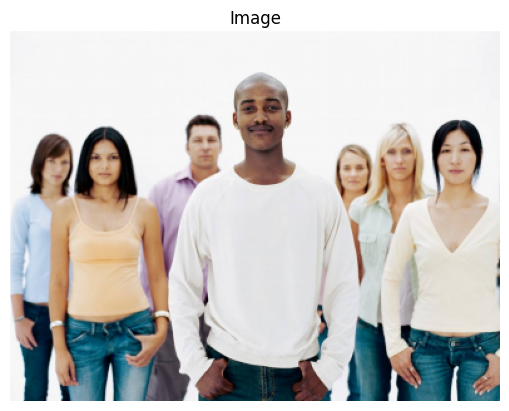

In [31]:
image = plt.imread("/content/darknet/data/questao2_provaMobit.png")

show_image(image, title='Image', cmap_type='gray')

In [32]:
!ls
# Detectando as pessoas
!./darknet detect cfg/yolov3-tiny.cfg yolov3-tiny.weights data/questao2_provaMobit.png


3rdparty		darknet_video.py       README.md
backup			data		       results
build			image_yolov3.sh        scripts
build.ps1		image_yolov4.sh        src
cfg			include		       vcpkg.json
cmake			json_mjpeg_streams.sh  vcpkg.json.opencv23
CMakeLists.txt		LICENSE		       video_yolov3.sh
darknet			Makefile	       video_yolov4.sh
DarknetConfig.cmake.in	net_cam_v3.sh	       yolov3-tiny.weights
darknet_images.py	net_cam_v4.sh
darknet.py		obj
 CUDA-version: 12010 (12000)
, cuDNN: 8.7.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1   

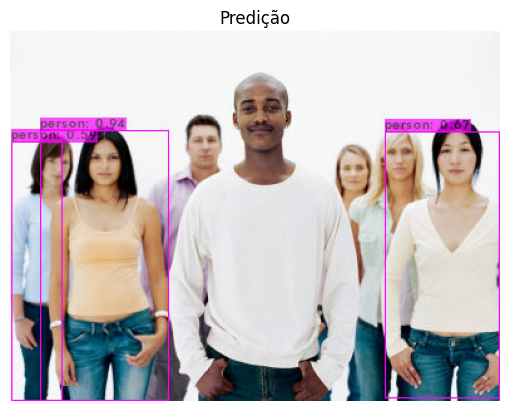

In [33]:
image = plt.imread("/content/darknet/predictions.jpg")

show_image(image, title='Predição', cmap_type='gray')